<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning-Projects/blob/main/Airline%20passenger%20satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline passenger satisfaction**
Here's what passengers think about flying in the United States. We use this data to predict passenger satisfaction

In [11]:
import zipfile
import os

# path to the zip file
zip_path = 'aviakompaniya.zip'

# directory for extraction
new_file_name = '/content/extracted_files'

# create the directory if it does not exist
os.makedirs(new_file_name, exist_ok=True)

# and extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(new_file_name)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [13]:
df=pd.read_csv('/content/extracted_files/train_dataset.csv')

In [14]:
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9972 non-null   int64  
 1   Gender                             9972 non-null   object 
 2   Customer Type                      9972 non-null   object 
 3   Age                                9972 non-null   int64  
 4   Type of Travel                     9972 non-null   object 
 5   Class                              9972 non-null   object 
 6   Flight Distance                    9972 non-null   int64  
 7   Inflight wifi service              9972 non-null   int64  
 8   Departure/Arrival time convenient  9972 non-null   int64  
 9   Ease of Online booking             9972 non-null   int64  
 10  Gate location                      9972 non-null   int64  
 11  Food and drink                     9972 non-null   int64  
 1

In [78]:
df.satisfaction.value_counts()

,count
satisfaction,
0,4986
1,4986


In [77]:
a,b=df['satisfaction'].value_counts()/len(df)
print(f'{np.round(a,2)}% of passengers are not satisfied, while the remaining {np.round(b,2)}% are satisfied')

0.5% of passengers are not satisfied, while the remaining 0.5% are satisfied


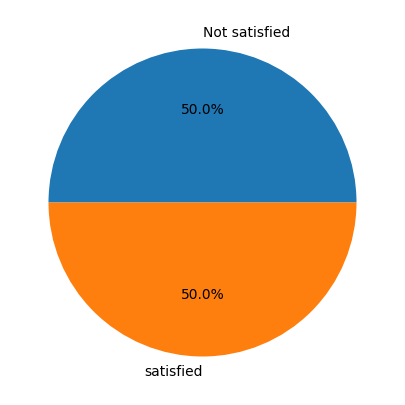

In [79]:
plt.figure(figsize=(10,5))
plt.pie(df['satisfaction'].value_counts(), labels=['Not satisfied','satisfied'], autopct='%1.1f%%')
plt.show()

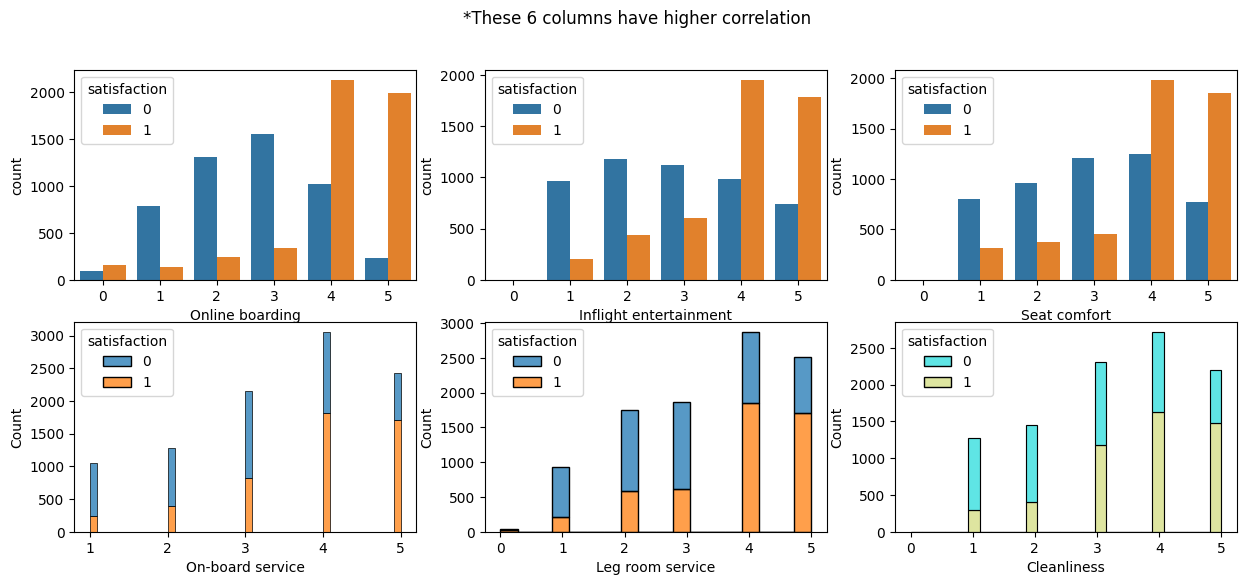

In [84]:
figure, axes=plt.subplots(2,3, figsize=(15,6))
figure.suptitle("*These 6 columns have higher correlation")
sns.countplot(data=df, x=df['Online boarding'], hue='satisfaction', ax=axes[0,0])
sns.countplot(data=df, x=df['Inflight entertainment'], hue='satisfaction', ax=axes[0,1])
sns.countplot(data=df, x=df['Seat comfort'], hue='satisfaction', ax=axes[0,2])
sns.histplot(data=df, x=df['On-board service'], hue='satisfaction', ax=axes[1,0], multiple='stack')
sns.histplot(data=df, x=df['Leg room service'], hue='satisfaction', ax=axes[1,1],multiple='stack')
sns.histplot(data=df, x=df['Cleanliness'], hue='satisfaction', ax=axes[1,2],multiple='stack', palette='rainbow')
plt.show()

In [34]:
df.drop('id',axis=1,inplace=True)

In [51]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['id','satisfaction']]


In [83]:
df[numerical_cols].corrwith(df['satisfaction']).sort_values(ascending=False)

,0
Online boarding,0.504671
Inflight entertainment,0.401109
Seat comfort,0.342061
On-board service,0.327361
Leg room service,0.325405
Cleanliness,0.310046
Flight Distance,0.298484
Inflight wifi service,0.277497
Baggage handling,0.248839
Inflight service,0.240580


In [52]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
catpipeline=Pipeline([
    ('onehot',OneHotEncoder())])
numpipeline=Pipeline([
    ('scaler',StandardScaler())])

fullpipeline=ColumnTransformer([
    ('cat',catpipeline,categorical_cols),
    ('num',numpipeline,numerical_cols)])

In [62]:
X=fullpipeline.fit_transform(x_train)

**Model Training**

In [63]:
forest=RandomForestClassifier()
RF_model=forest.fit(X,y_train)

In [64]:
Xtest=fullpipeline.transform(x_test)
predictedX=RF_model.predict(Xtest)


In [65]:
confusion_matrix(y_test,predictedX)

array([[974,  39],
       [ 57, 925]])

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1013
           1       0.96      0.94      0.95       982

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995



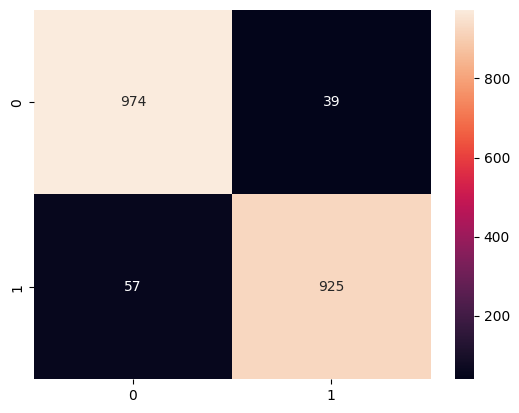

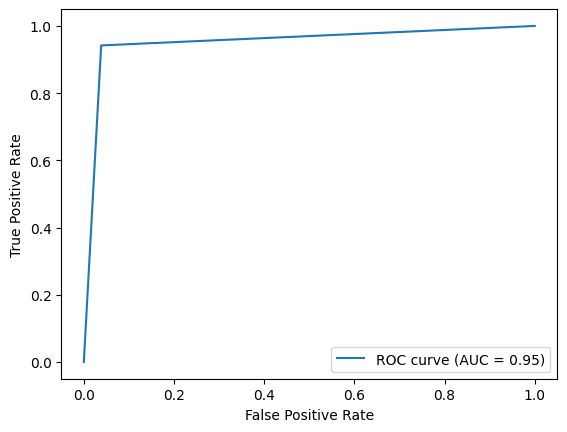

In [70]:
print(classification_report(y_test,predictedX))

conf_mat = confusion_matrix(y_test, predictedX)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictedX)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1013
           1       0.96      0.94      0.95       982

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995



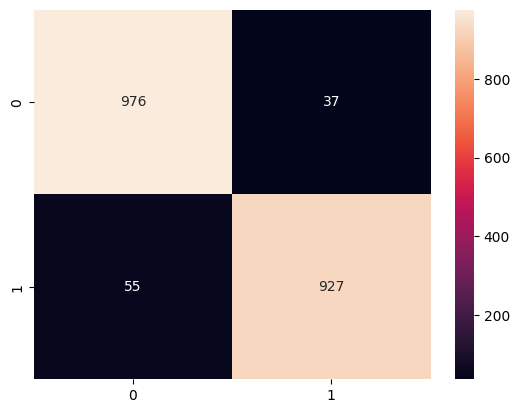

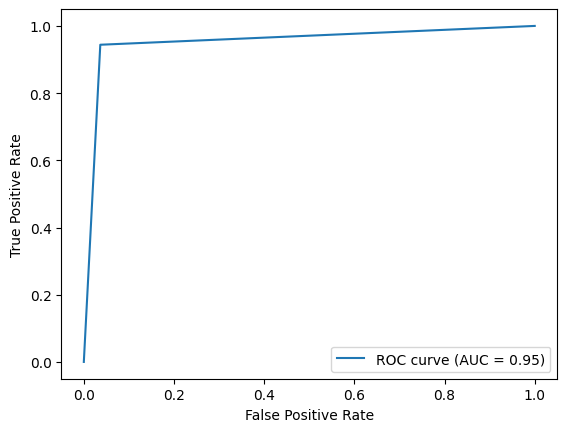

In [69]:
xgb_model = XGBClassifier()
xgb_model.fit(X, y_train)

y_pred = xgb_model.predict(Xtest)
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


Concluision: Both of our models (RF, xgb) are working with 95% accuracy, with the performance of xgb is a bit better comapred to Rf model based on confusion matrix.



**Testing**

In [71]:
test_set=pd.read_csv("/content/extracted_files/test_dataset.csv")
test_set

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,...,4,4,1,4,2,3,1,4,29,36.0
3996,3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,...,2,2,3,2,4,2,3,2,0,0.0
3997,3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,...,2,2,1,1,2,2,3,2,23,45.0
3998,3999,Male,Loyal Customer,23,Business travel,Eco,978,5,2,2,...,4,5,1,5,1,1,3,5,0,0.0


In [74]:
pipelinedX=fullpipeline.transform(test_set)
prediction=xgb_model.predict(pipelinedX)
solution=pd.DataFrame({'id':test_set['id'],'price':prediction})
solution.to_csv('satisfaction_solution.csv',index=False)